# Clustering-based Outlier Detection

Outliers are points that don't belong well to any cluster, or belong to small, sparse clusters. Normal data points form dense clusters, while outliers are either:

``` Far from all cluster centers ```

``` In very small clusters```

```In low-density regions between clusters```

### Main Approaches
1. Distance to Cluster Centers
Points far from their nearest cluster center are outliers

2. Cluster Size-Based
Points in very small clusters are considered outliers

3. Density-Based
Points in low-density regions are outliers (DBSCAN)

4. Membership-Based
Points with low membership probabilities are outliers

## Clustering Algorithms for Outlier Detection

1. K-Means Based Outlier Detection
Theory:
Points that are far from their nearest cluster centroid are potential outliers.

Outlier Score:


``` Score(x) = distance(x, centroid_of_nearest_cluster)```
### Step-by-Step Example:
```bash
Dataset: Customer spending patterns


Cluster 1 (Budget shoppers): [100, 150, 120, 130, 140]
Cluster 2 (Regular shoppers): [300, 350, 320, 330, 340]  
Outlier: [800]  ← High spender
K-Means with k=2:


Centroid 1 = 128, Centroid 2 = 328
Calculate distances:


Point 100: distance to centroid 1 = |100-128| = 28
Point 800: distance to centroid 2 = |800-328| = 472  ← Outlier!
```
---
:



## 2. DBSCAN (Density-Based Spatial Clustering)

DBSCAN naturally identifies outliers as points that don't belong to any cluster (noise points).

Key Parameters:

eps (ε): Maximum distance between two points to be considered neighbors

min_samples: Minimum number of points to form a dense region

Outlier Identification:

Points labeled as -1 are outliers/noise

### Step-by-Step Example:
Dataset: Spatial points with density variations
```bash


Dense region: [1,1], [1,2], [2,1], [2,2], [1.5,1.5]
Sparse point: [8,8]  ← Outlier

DBSCAN with eps=1.5, min_samples=3:

Core points: [1,1], [1,2], [2,1], [2,2], [1.5,1.5] (all have ≥3 neighbors within ε)
Border points: None in this case
Noise/Outlier: [8,8] (no nearby points)
```


## 3. Gaussian Mixture Models (GMM)

Points with low probability under the mixture model are outliers.

Outlier Score:


``` Score(x) = -log(Σ πᵢ × N(x | μᵢ, Σᵢ))```
Where πᵢ are mixture weights, μᵢ are means, Σᵢ are covariances.

### Step-by-Step Example:
Dataset: Heights of different populations

``` bash
Population 1 (Adults): [165, 170, 175, 168, 172] cm
Population 2 (Children): [120, 125, 118, 122, 128] cm
Outlier: [200] cm  ← Very tall person

GMM with 2 components:


Component 1: μ=170, σ=5 (Adults)
Component 2: μ=123, σ=4 (Children)

Probability calculation:


Point 175: High probability under component 1
Point 200: Very low probability under both components → Outlier

```

## 4. Hierarchical Clustering Based

Points that form singleton clusters or join the main clusters at very high distances are outliers.

Approaches:

Cut the dendrogram at a certain height, singletons are outliers

Small clusters at the cutting point are outliers


```K-Means	Fast, simple	Assumes spherical clusters	Well-separated, globular clusters```

```DBSCAN	Finds arbitrary shapes, no cluster number needed	Sensitive to parameters	Data with varying densities```

```GMM	Probabilistic, soft assignments	Computationally expensive	Overlapping clusters```


```Hierarchical	Visual dendrogram, multi-level	Computationally expensive	Data with hierarchical structure```

=== Clustering-based Outlier Detection Results ===
K-Means: Detected 13 outliers
DBSCAN: Detected 15 outliers
GMM: Detected 27 outliers


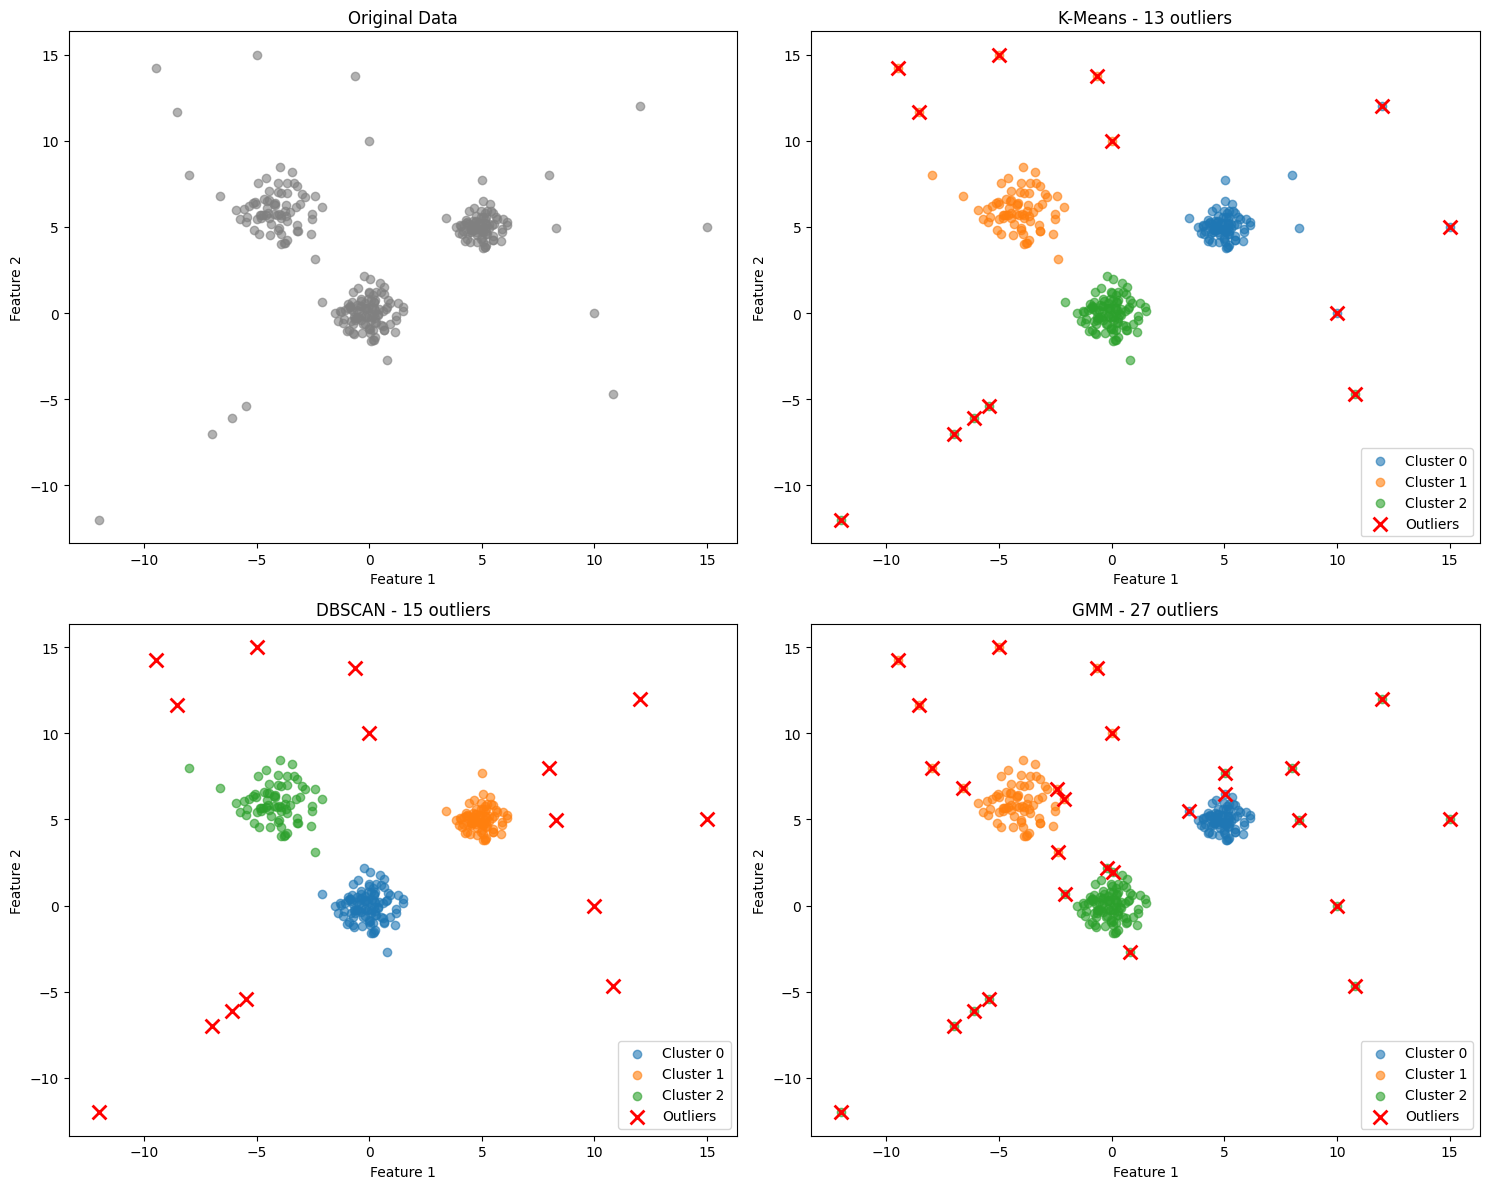


=== DBSCAN Parameter Sensitivity ===
min_samples    3     5      10     15
eps                                  
0.100000     46.0  90.0  174.0  238.0
0.311111     19.0  19.0   19.0   21.0
0.522222     12.0  15.0   15.0   16.0
0.733333     10.0  13.0   13.0   13.0
0.944444     10.0  13.0   13.0   13.0
1.155556      5.0  10.0   11.0   11.0
1.366667      5.0  10.0   10.0   10.0
1.577778      2.0   6.0    8.0    8.0
1.788889      1.0   1.0    1.0    3.0
2.000000      0.0   1.0    1.0    1.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

class ClusteringOutlierDetector:
    """
    Comprehensive clustering-based outlier detection
    """
    
    def __init__(self):
        self.scaler = StandardScaler()
    
    def detect_outliers(self, X, method='dbscan', **kwargs):
        """
        Detect outliers using specified clustering method
        """
        X_scaled = self.scaler.fit_transform(X)
        
        if method == 'kmeans':
            return self._kmeans_outliers(X_scaled, **kwargs)
        elif method == 'dbscan':
            return self._dbscan_outliers(X_scaled, **kwargs)
        elif method == 'gmm':
            return self._gmm_outliers(X_scaled, **kwargs)
        elif method == 'hierarchical':
            return self._hierarchical_outliers(X_scaled, **kwargs)
        else:
            raise ValueError(f"Unknown method: {method}")
    
    def _kmeans_outliers(self, X, k=3, threshold_multiplier=2.0):
        from sklearn.cluster import KMeans
        
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        
        # Distance to nearest centroid
        distances = np.min(np.linalg.norm(
            X[:, np.newaxis] - kmeans.cluster_centers_, axis=2), axis=1)
        
        threshold = np.mean(distances) + threshold_multiplier * np.std(distances)
        outlier_mask = distances > threshold
        
        return {
            'method': 'K-Means',
            'scores': distances,
            'outlier_mask': outlier_mask,
            'labels': kmeans.labels_,
            'centers': kmeans.cluster_centers_,
            'threshold': threshold
        }
    
    def _dbscan_outliers(self, X, eps=0.5, min_samples=5):
        from sklearn.cluster import DBSCAN
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        outlier_mask = labels == -1
        
        return {
            'method': 'DBSCAN',
            'scores': np.where(outlier_mask, 1, 0),  # Binary scores for DBSCAN
            'outlier_mask': outlier_mask,
            'labels': labels,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
        }
    
    def _gmm_outliers(self, X, n_components=3, contamination=0.1):
        from sklearn.mixture import GaussianMixture
        
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        
        log_likelihood = gmm.score_samples(X)
        scores = -log_likelihood
        
        threshold = np.quantile(scores, 1 - contamination)
        outlier_mask = scores > threshold
        
        return {
            'method': 'GMM',
            'scores': scores,
            'outlier_mask': outlier_mask,
            'labels': gmm.predict(X),
            'probabilities': gmm.predict_proba(X),
            'threshold': threshold
        }
    
    def compare_methods(self, X, methods=None):
        """
        Compare multiple clustering methods
        """
        if methods is None:
            methods = ['kmeans', 'dbscan', 'gmm']
        
        results = {}
        for method in methods:
            results[method] = self.detect_outliers(X, method=method)
        
        return results

# Comprehensive Example
def create_complex_dataset():
    """
    Create a complex dataset with multiple clusters and outliers
    """
    np.random.seed(42)
    
    # Three main clusters
    cluster1, _ = make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=0.8, random_state=42)
    cluster2, _ = make_blobs(n_samples=80, centers=[[5, 5]], cluster_std=0.6, random_state=42)
    cluster3, _ = make_blobs(n_samples=70, centers=[[-4, 6]], cluster_std=1.0, random_state=42)
    
    # Some outliers
    outliers = np.array([
        [8, 8], [-7, -7], [10, 0], [0, 10], [-8, 8],
        [12, 12], [-12, -12], [15, 5], [-5, 15]
    ])
    
    # Some points in low-density regions
    low_density = np.random.uniform(-10, 15, (10, 2))
    
    X = np.vstack([cluster1, cluster2, cluster3, outliers, low_density])
    
    return X

# Create dataset
X = create_complex_dataset()

# Initialize detector
detector = ClusteringOutlierDetector()

# Compare different methods
methods = ['kmeans', 'dbscan', 'gmm']
results = detector.compare_methods(X, methods)

# Print results
print("=== Clustering-based Outlier Detection Results ===")
for method, result in results.items():
    n_outliers = np.sum(result['outlier_mask'])
    print(f"{result['method']}: Detected {n_outliers} outliers")

# Visualization
def plot_clustering_results(X, results):
    """
    Visualize results from different clustering methods
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    # Plot original data
    axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6, c='gray')
    axes[0].set_title('Original Data')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    
    # Plot results for each method
    for i, (method, result) in enumerate(results.items()):
        ax = axes[i + 1]
        
        # Plot normal points
        normal_points = X[~result['outlier_mask']]
        outlier_points = X[result['outlier_mask']]
        
        if 'labels' in result:
            # Color by cluster
            labels = result['labels']
            unique_labels = np.unique(labels)
            
            for label in unique_labels:
                if label == -1:  # Outliers in DBSCAN
                    continue
                cluster_points = X[labels == label]
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          alpha=0.6, label=f'Cluster {label}')
        else:
            ax.scatter(normal_points[:, 0], normal_points[:, 1], 
                      alpha=0.6, c='blue', label='Normal')
        
        # Plot outliers
        ax.scatter(outlier_points[:, 0], outlier_points[:, 1], 
                  c='red', s=100, marker='x', linewidth=2, label='Outliers')
        
        ax.set_title(f'{result["method"]} - {len(outlier_points)} outliers')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Visualize results
plot_clustering_results(X, results)

# Advanced: Parameter sensitivity analysis
def parameter_sensitivity_analysis(X, method='dbscan'):
    """
    Analyze sensitivity to parameter choices
    """
    detector = ClusteringOutlierDetector()
    
    if method == 'dbscan':
        eps_values = np.linspace(0.1, 2.0, 10)
        min_samples_values = [3, 5, 10, 15]
        
        results = []
        for eps in eps_values:
            for min_samples in min_samples_values:
                try:
                    result = detector.detect_outliers(X, method='dbscan', 
                                                     eps=eps, min_samples=min_samples)
                    results.append({
                        'eps': eps,
                        'min_samples': min_samples,
                        'n_outliers': np.sum(result['outlier_mask']),
                        'n_clusters': result['n_clusters']
                    })
                except:
                    continue
        
        return pd.DataFrame(results)
    
    elif method == 'kmeans':
        k_values = range(2, 11)
        threshold_multipliers = [1.5, 2.0, 2.5, 3.0]
        
        results = []
        for k in k_values:
            for multiplier in threshold_multipliers:
                result = detector.detect_outliers(X, method='kmeans', 
                                                 k=k, threshold_multiplier=multiplier)
                results.append({
                    'k': k,
                    'threshold_multiplier': multiplier,
                    'n_outliers': np.sum(result['outlier_mask'])
                })
        
        return pd.DataFrame(results)

# Perform sensitivity analysis
print("\n=== DBSCAN Parameter Sensitivity ===")
sensitivity_df = parameter_sensitivity_analysis(X, 'dbscan')
print(sensitivity_df.pivot_table(
    index='eps', 
    columns='min_samples', 
    values='n_outliers'
))

# How can clustering be used for outlier detection
Clustering-based outlier detection leverages the natural grouping structure of data. The core principle is that normal data points form dense clusters, while outliers either don't belong to any cluster or form very small, sparse clusters.

I typically use several approaches:

K-Means: Points far from their nearest cluster centroid are outliers

DBSCAN: Points labeled as noise (-1) are natural outliers

GMM: Points with very low probability under the mixture model are outliers

Hierarchical: Singleton clusters or small clusters are outliers

DBSCAN is particularly effective because it explicitly identifies outliers as part of its clustering process. The key advantage is that clustering methods can find outliers that aren't extreme in any single dimension but are unusual in their combination of features within the cluster context.

## Real-World Applications
Network Security: Detect anomalous connections that don't match normal traffic patterns

Fraud Detection: Identify transactions that don't fit typical customer behavior clusters

Manufacturing: Find defective products that deviate from normal production clusters

Healthcare: Identify unusual patient profiles that don't match disease pattern clusters

Anomaly Detection in IoT: Detect sensor readings that don't belong to normal operation clusters